In [21]:
import geopandas as gpd
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
fp = "Shapefile - Censo 2010 (Municipal)\inegi_refcenmuni_2010.shp"

map_df = gpd.read_file(fp, encoding = 'latin')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe

In [53]:
with open("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/rawdata/paresZMVM.pkl", "rb") as f:
    data = pkl.load(f)

In [54]:
def get_cve_mun(tupla):
    est = tupla[0]
    mun = tupla[1]
    est = "0"*(2-len(str(est))) + str(est)
    mun = "0"*(3-len(str(mun))) + str(mun)
    return est + mun

In [55]:
cves = list(map(get_cve_mun, data))

In [57]:
map_ZMVM = map_df[map_df.cve_umun.isin(cves)]

In [59]:
map_ZMVM

,gid,cve_ent,nom_mun,cve_umun,no_locs,p_total,pobmas,pobfem,p_0a2,p_0a2_m,...,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,nom_ent,rep_pobtot,geometry
0,1,09,Tlalpan,09012,141.0,650567.0,312014.0,338334.0,26642.0,13691.0,...,151917.0,134366.0,93095.0,88544.0,123912.0,134358.0,73181.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.19671 19.30240, -99.19629 19.302..."
1,2,09,Xochimilco,09013,94.0,415007.0,205255.0,209665.0,18465.0,9557.0,...,85860.0,72315.0,44084.0,42181.0,66461.0,73837.0,31875.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.13301 19.21010, -99.13832 19.215..."
2,3,09,La Magdalena Contreras,09008,13.0,239086.0,114484.0,124582.0,10571.0,5287.0,...,55574.0,48264.0,28596.0,28505.0,44160.0,46298.0,22542.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.24489 19.27621, -99.24476 19.276..."
3,6,09,Cuauhtémoc,09015,1.0,531831.0,251725.0,280106.0,18953.0,9723.0,...,154622.0,126570.0,64716.0,90603.0,124491.0,132820.0,74373.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.17439 19.40452, -99.17487 19.404..."
4,7,09,Álvaro Obregón,09010,4.0,727034.0,346041.0,380993.0,29724.0,14982.0,...,178043.0,155705.0,95636.0,99625.0,142854.0,152508.0,82006.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
5,4,09,Azcapotzalco,09002,1.0,414711.0,196053.0,218658.0,14917.0,7688.0,...,107269.0,93517.0,52913.0,60003.0,86750.0,88236.0,47225.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.15718 19.50285, -99.15695 19.502..."
6,5,09,Benito Juárez,09014,1.0,385439.0,176410.0,209029.0,10708.0,5432.0,...,128000.0,111593.0,90655.0,99965.0,113688.0,117126.0,90357.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.14350 19.35724, -99.14386 19.357..."
7,8,09,Gustavo A. Madero,09005,1.0,1185772.0,571233.0,614539.0,46902.0,23797.0,...,287114.0,243385.0,133434.0,138195.0,220650.0,228781.0,104847.0,Distrito Federal,Población de más de 1 millón de habitantes,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
8,9,09,Cuajimalpa de Morelos,09004,20.0,186391.0,88628.0,97733.0,8879.0,4435.0,...,40584.0,36002.0,24539.0,23753.0,33289.0,36467.0,20271.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
9,10,09,Miguel Hidalgo,09016,1.0,372889.0,172667.0,200222.0,12598.0,6330.0,...,106850.0,93826.0,64435.0,72334.0,89465.0,94489.0,62036.0,Distrito Federal,Población de 100 mil a 1 millón de habitantes,"POLYGON ((-99.16371 19.45643, -99.16372 19.456..."


In [71]:
regiones = {
    1: ["09016","09015","09014","09003"],
    2: ["09002", "09005", "15104", "15109", "15020"],
    3: ["15095", "15060", "15121", "15013", "15057", "15037", "09004",
       "09010", "09008"],
    4: ["15058", "15070", "15031", "15100",
       "15029", "15039", "15099"],
    5: ["09012", "09013", "09009", "09011", "15122", "15025", "15083", "15068"],
    6: ["15010", "15035", "15091", "15024", "15108", "15044", "15120"],
    7: ["09017", "09006", "09007"],
    8: ["15081", "15092","13069", "15033"]
}


mun_ZMVM = []
for value in regiones.values():
    mun_ZMVM.extend(value)
    
    
def asignar_region(x):
    for k, v in regiones.items():
        if x in v:
            return k
        
map_ZMVM["region"] = map_ZMVM["cve_umun"].apply(lambda x: asignar_region(x))

In [84]:
regiones = map_ZMVM.dissolve(by="region")

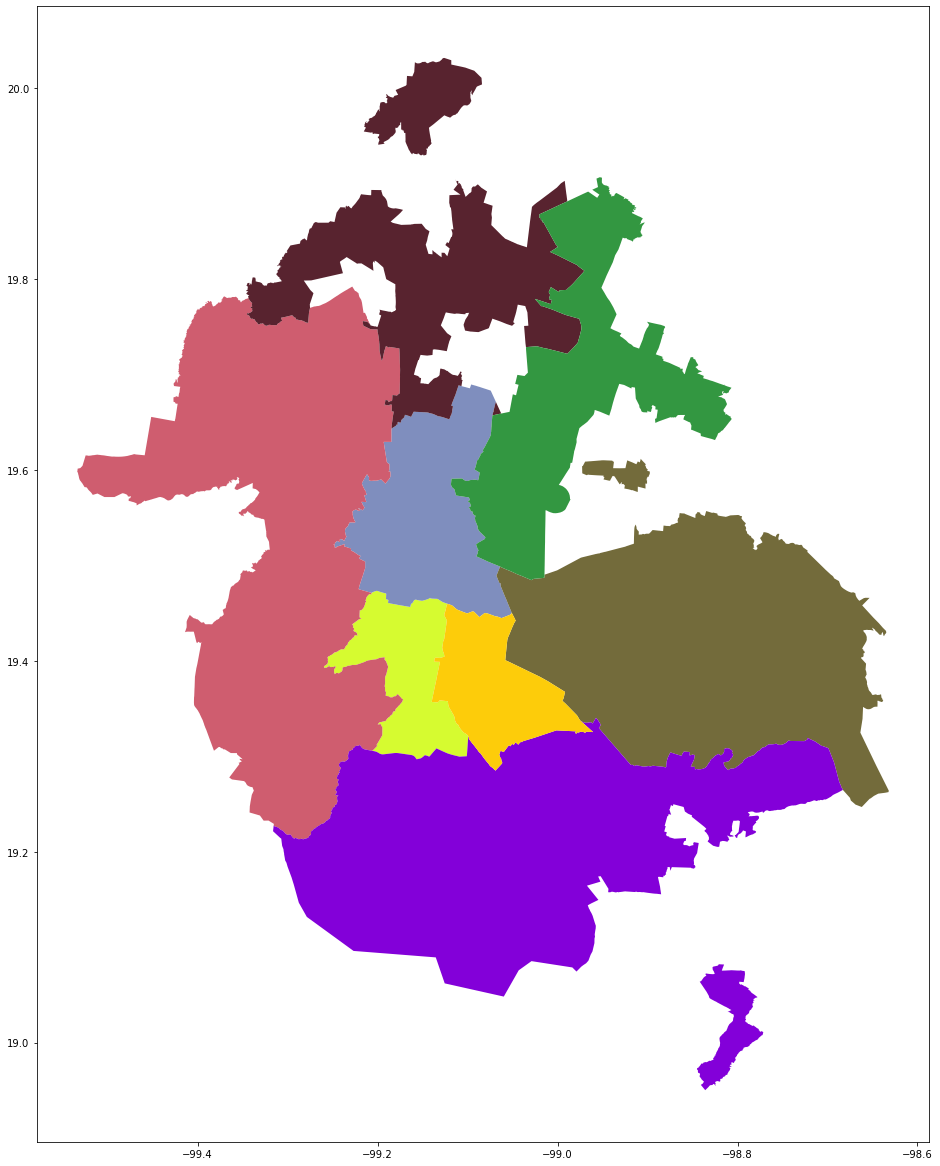

In [134]:
import random
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
colors = get_colors(8)
ax = regiones.plot(color = colors)
f = plt.gcf()

f.set_size_inches(16, 24)
plt.show()

In [ ]:
η

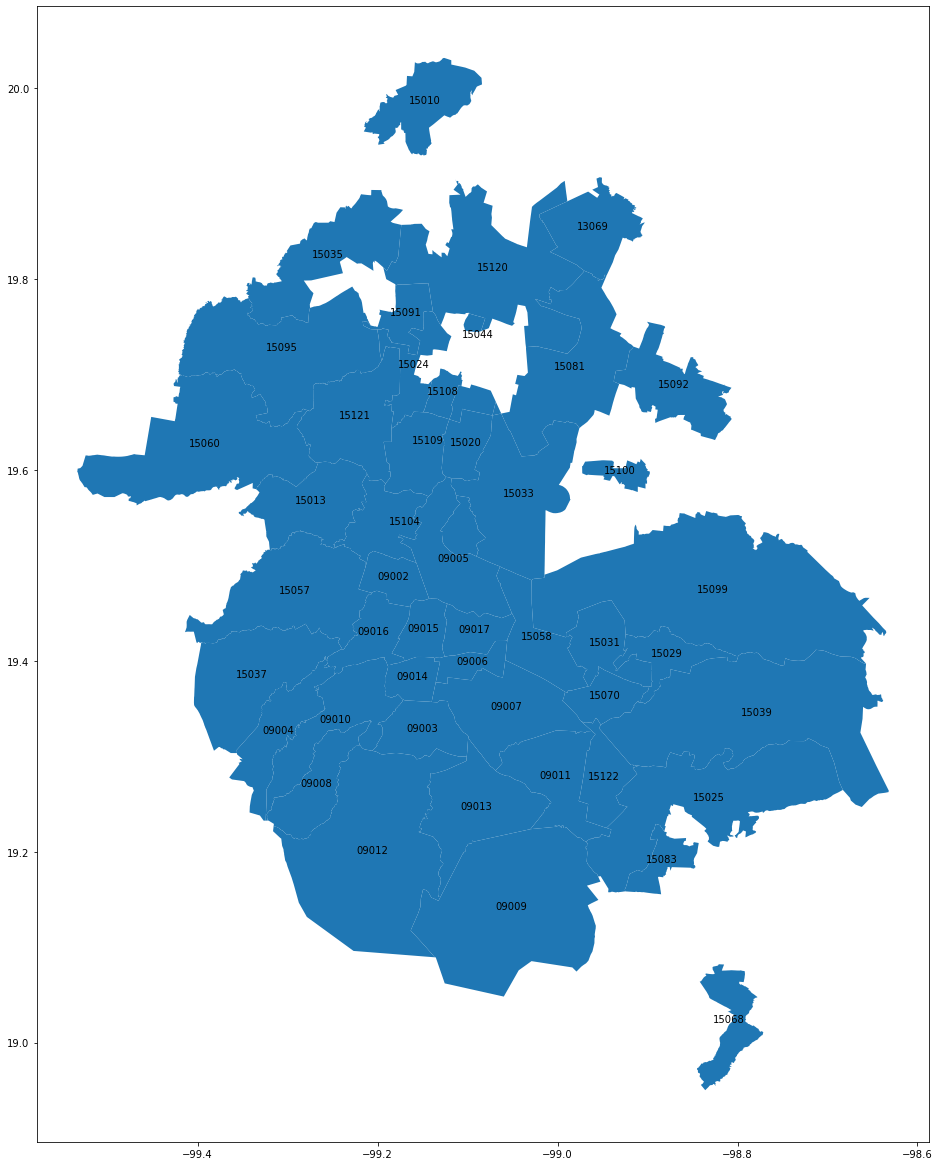